In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
#import warnings library
import warnings
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


breast-cancer-wisconsin-data

/kaggle/input/breast-cancer-wisconsin-data/data.csv


Veri İçeriği<br>
1. 1. kimlik Numarası<br>
1. 2. Teşhis (M = malign, B = iyi huylu)<br>
1. 3. yarıçap (merkezden çevre üzerindeki noktalara olan mesafelerin ortalaması)<br>
1. 4. doku (gri tonlama değerlerinin standart sapması)<br>
1. 5. çevre<br>
1. 6. alan<br>
1. 7. pürüzsüzlük (yarıçap uzunluklarında yerel değişiklik)<br>
1. 8. kompaktlık (çevre^2 / alan - 1,0)<br>
1. 9. içbükeylik (konturun içbükey kısımlarının ciddiyeti)<br>
1. 10. içbükey noktalar (konturun içbükey kısımlarının sayısı)<br>
1. 11. simetri<br>
1. 12. fraktal boyut ("kıyı şeridi yaklaşımı" - 1)<br>
1. 13. Bu özelliklerin ortalaması, standart hatası ve "en kötü" veya en büyüğü (en büyük üç değerin ortalaması), her görüntü için hesaplandı ve sonuçta 30<br> özellik elde edildi. Örneğin, alan 3 Ortalama Yarıçap, alan 13 Yarıçap SE, alan 23 En Kötü Yarıçaptır.<br>
1. 14. Tüm özellik değerleri, dört anlamlı basamakla yeniden kodlanır.<br>
1. 15. Eksik özellik değerleri: yok<br>
1. 16. Sınıf dağılımı: 357 iyi huylu, 212 kötü huylu<br>
----------------------------<br>
 Data Content<br>
1. ID number<br>
2. Diagnosis (M = malignant, B = benign)<br>
3. radius (mean of distances from center to points on the perimeter)<br>
4. texture (standard deviation of gray-scale values)<br>
5. perimeter<br>
6. area<br>
7. smoothness (local variation in radius lengths)<br>
8. compactness (perimeter^2 / area - 1.0)<br>
9. concavity (severity of concave portions of the contour)<br>
10. concave points (number of concave portions of the contour)<br>
11. symmetry<br>
12. fractal dimension ("coastline approximation" - 1)<br>
13. The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 <br>features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.<br>
14. All feature values are recoded with four significant digits.<br>
15. Missing attribute values: none<br>
16. Class distribution: 357 benign, 212 malignant<br>

In [2]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [3]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

Dikkatimi çeken 4 şey var 1) Sınıflandırma için kullanılamayacak bir id var 2) Tanı bizim sınıf etiketimiz 3) Unnamed: 32 özelliği NaN içeriyor yani ihtiyacımız yok. 4) Diğer özellik adları hakkında hiçbir fikrim yok aslında ihtiyacım yok çünkü makine öğrenimi harika :)

Bu nedenle, bu gereksiz özellikleri bırakın. Ancak bunun bir özellik seçimi olmadığını unutmayın. Bu bir pub'a göz atmak gibi, içeceğimizi henüz seçmiyoruz !!!

In [4]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [6]:
fig = px.histogram(y, x="diagnosis", color="diagnosis",width=700,height=500)
fig.show()

Tamam, şimdi özelliklerimiz var ama ne anlama geliyorlar ya da aslında bu özellikler hakkında ne kadar bilmemiz gerekiyor? varyans, standart sapma, örnek sayısı (count) veya max min değerleri. Bu tür bilgiler, verilerde neler olup bittiğini anlamaya yardımcı olur. Örneğin, aklıma field_mean özelliğinin max değeri 2500 ve smoothness_mean özelliklerinin max 0.16340 olduğu sorusu geldi. Bu nedenle görselleştirme, özellik seçimi, özellik çıkarma veya sınıflandırmadan önce standartlaştırmaya veya normalleştirmeye ihtiyacımız var mı? Cevap evet ve hayır şaşırtıcı değil.
Neyse adım adım gidelim ve görselleştirme ile başlayalım.

In [7]:
x.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

görselleştirme
Verileri görselleştirmek için, sizi bilgilendirmek ve arazilerin çeşitliliği için diğer çekirdeklerde kullanılmayan seaborn grafiklerini kullanacağız. Gerçek hayatta kullandığım şeyler çoğunlukla keman planı ve sürü planıdır. Unutmayın, özellik seçmiyoruz, bar kapısındaki içecek listesine bakmak gibi verileri öğrenmeye çalışıyoruz.

Keman ve sürü grafiğinden önce normalleştirme veya standardizasyona ihtiyacımız var. Çünkü özelliklerin değerleri arasındaki farklar arsa üzerinde gözlemlenemeyecek kadar yüksektir. Özellikleri 3 grupta çiziyorum ve her grupta daha iyi gözlemlemek için 10 özellik var.

In [8]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
fig = px.violin(data, y='value', x='features', color='diagnosis', box=True, points="all")
fig.show()


Yukarıdaki grafiği birlikte yorumlayalım. Örneğin, texture_mean özelliğinde Malign ve Benign'in ortancası ayrılmış gibi görünüyor, bu nedenle sınıflandırma için iyi olabilir. Ancak fractal_dimension_mean özelliğinde Malign ve Benign'ın ortancası ayrılmış gibi görünmediğinden sınıflandırma için iyi bilgi vermez.

In [9]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

fig = px.violin(data, y='value', x='features', color='diagnosis', box=True, points="all")
fig.show()

In [10]:
# third ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
fig = px.violin(data, y='value', x='features', color='diagnosis', box=True, points="all")
fig.show()

Yukarıdaki arsa hakkında bir şey daha yorumlayalım, concavity_worst ve concave point_worst değişkeni benzer görünüyor ama birbirleriyle ilişkili olup olmadıklarına nasıl karar verebiliriz. (Her zaman doğru değil ama temel olarak özellikler birbiriyle ilişkiliyse bunlardan birini bırakabiliriz)

İki özelliği daha derinlemesine karşılaştırmak için ortak çizimi kullanalım. Buna aşağıdaki ortak arsada bakın, gerçekten ilişkilidir. Pearsonr değeri korelasyon değeridir ve 1 en yüksek değerdir. Dolayısıyla 0.86 korelasyonlu olduklarını söylemek için yeterli görünmektedir. Unutmayın, özellikleri henüz seçmiyoruz, sadece onlar hakkında fikir sahibi olmaya çalışıyoruz.

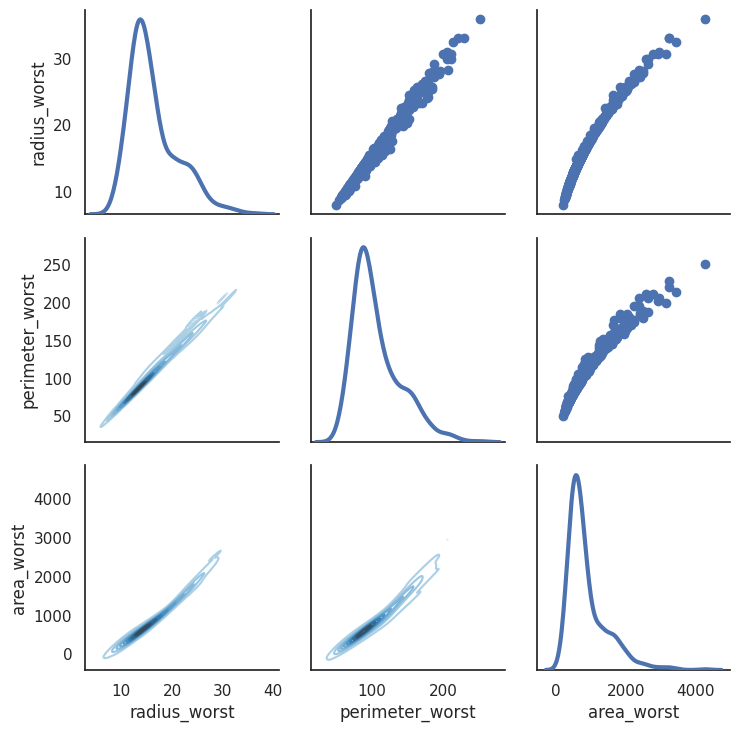

In [11]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

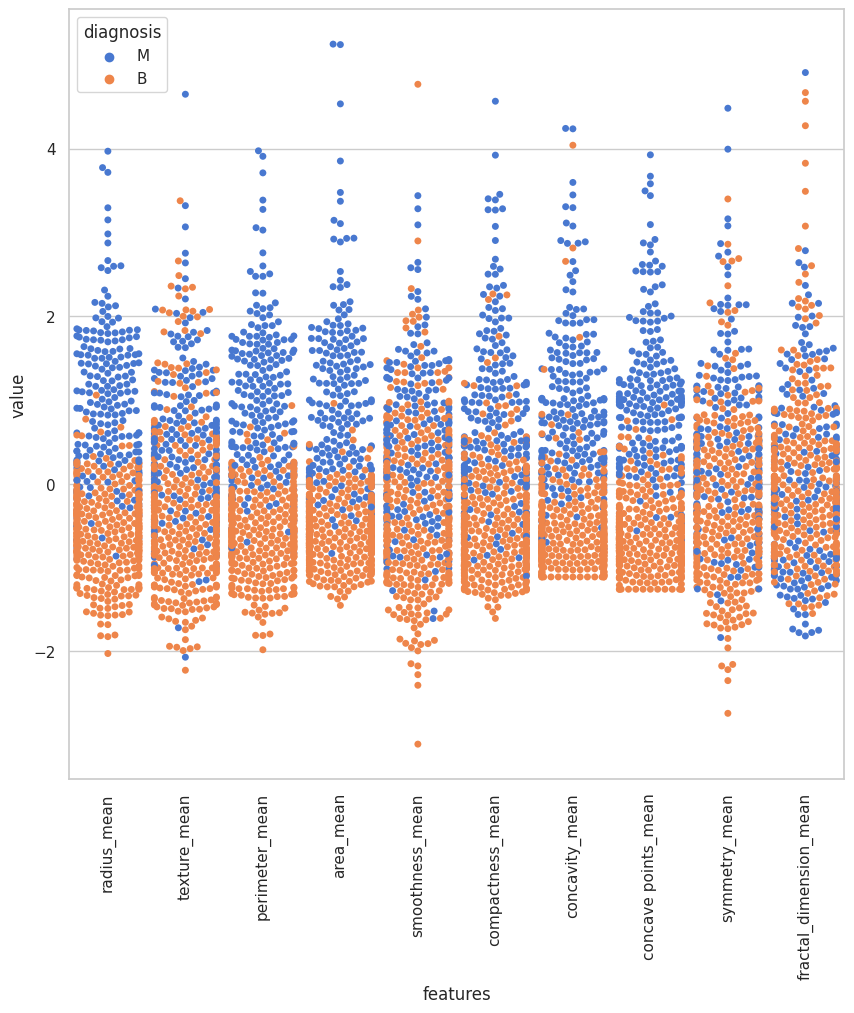

In [12]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

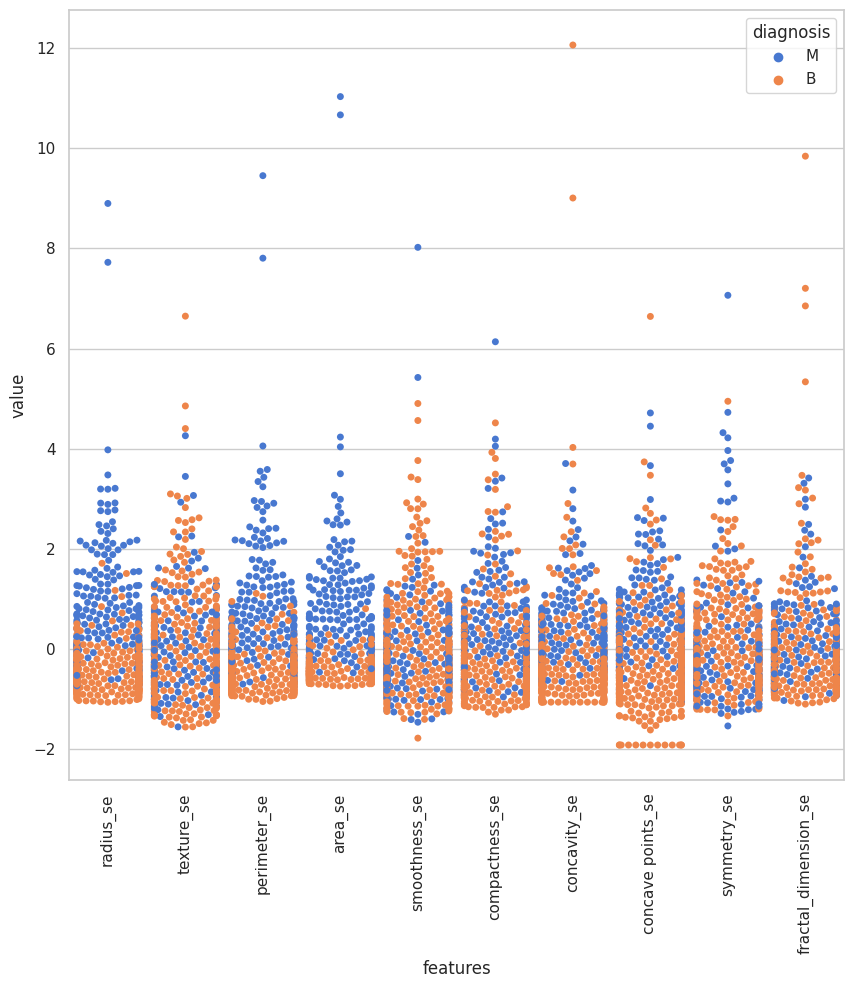

In [13]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  65.69362616539001  s


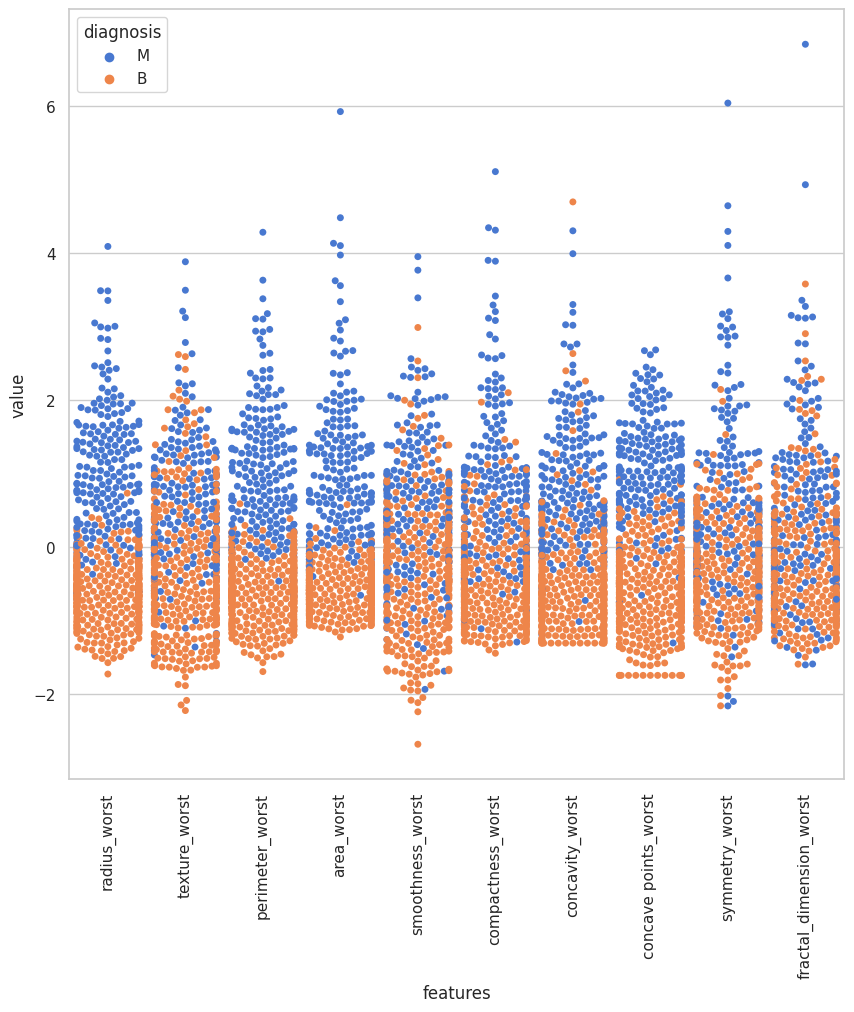

In [14]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

Harika görünüyorlar. Ve varyansı daha net görebilirsiniz. Size bir soru sorayım, bu üç parselde hangi özellik sınıflandırma açısından daha net görünüyor. Bana göre son sürü arsasında area_worst kötü huylu ve iyi huylu gibi görünüyor, tamamen değil, çoğunlukla ayrılıyor. Ancak sürü arsa 2'deki pürüzsüzlük_se, kötü huylu ve iyi huylu gibi görünüyor, bu nedenle bu özelliği kullanırken sınıflandırmak zor.

Ya özellikler arasındaki tüm korelasyonu gözlemlemek istiyorsak? Evet haklısın. Cevap, eski ama güçlü çizim yöntemi olan ısı haritasıdır.

In [15]:
def dummies(train_df:pd.DataFrame,columns):
    from sklearn import preprocessing
    le=preprocessing.LabelEncoder()
    train_df[columns]=le.fit_transform(train_df[columns])
    
    
    
    train_df=pd.get_dummies(train_df,columns=[columns])
    return train_df

In [16]:
dataa = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
dataa=dummies(dataa,"diagnosis")
dataa.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  area_worst  smoothness_worst  compactness_worst  \
0         0.2419  ...      2019.0            0.1622             0.6656   
1         0.1812  ...      1956.0            0.1238             0.1866   
2         0.2069  ...      1709.0            0.1444             0.4245   
3         0.2597  ...       567.7            0.2098             0.8663   
4         0.1809  ...      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  diagnosis_0  diagnosis_1  
0                  0.11890          NaN            0            1  
1                  0.08902          NaN            0            1  
2                  0.08758          NaN            0            1  
3                  0.17300          NaN            0            1  
4                  0.07678          NaN            0            1  

[5 rows x 34 columns]

<AxesSubplot: >

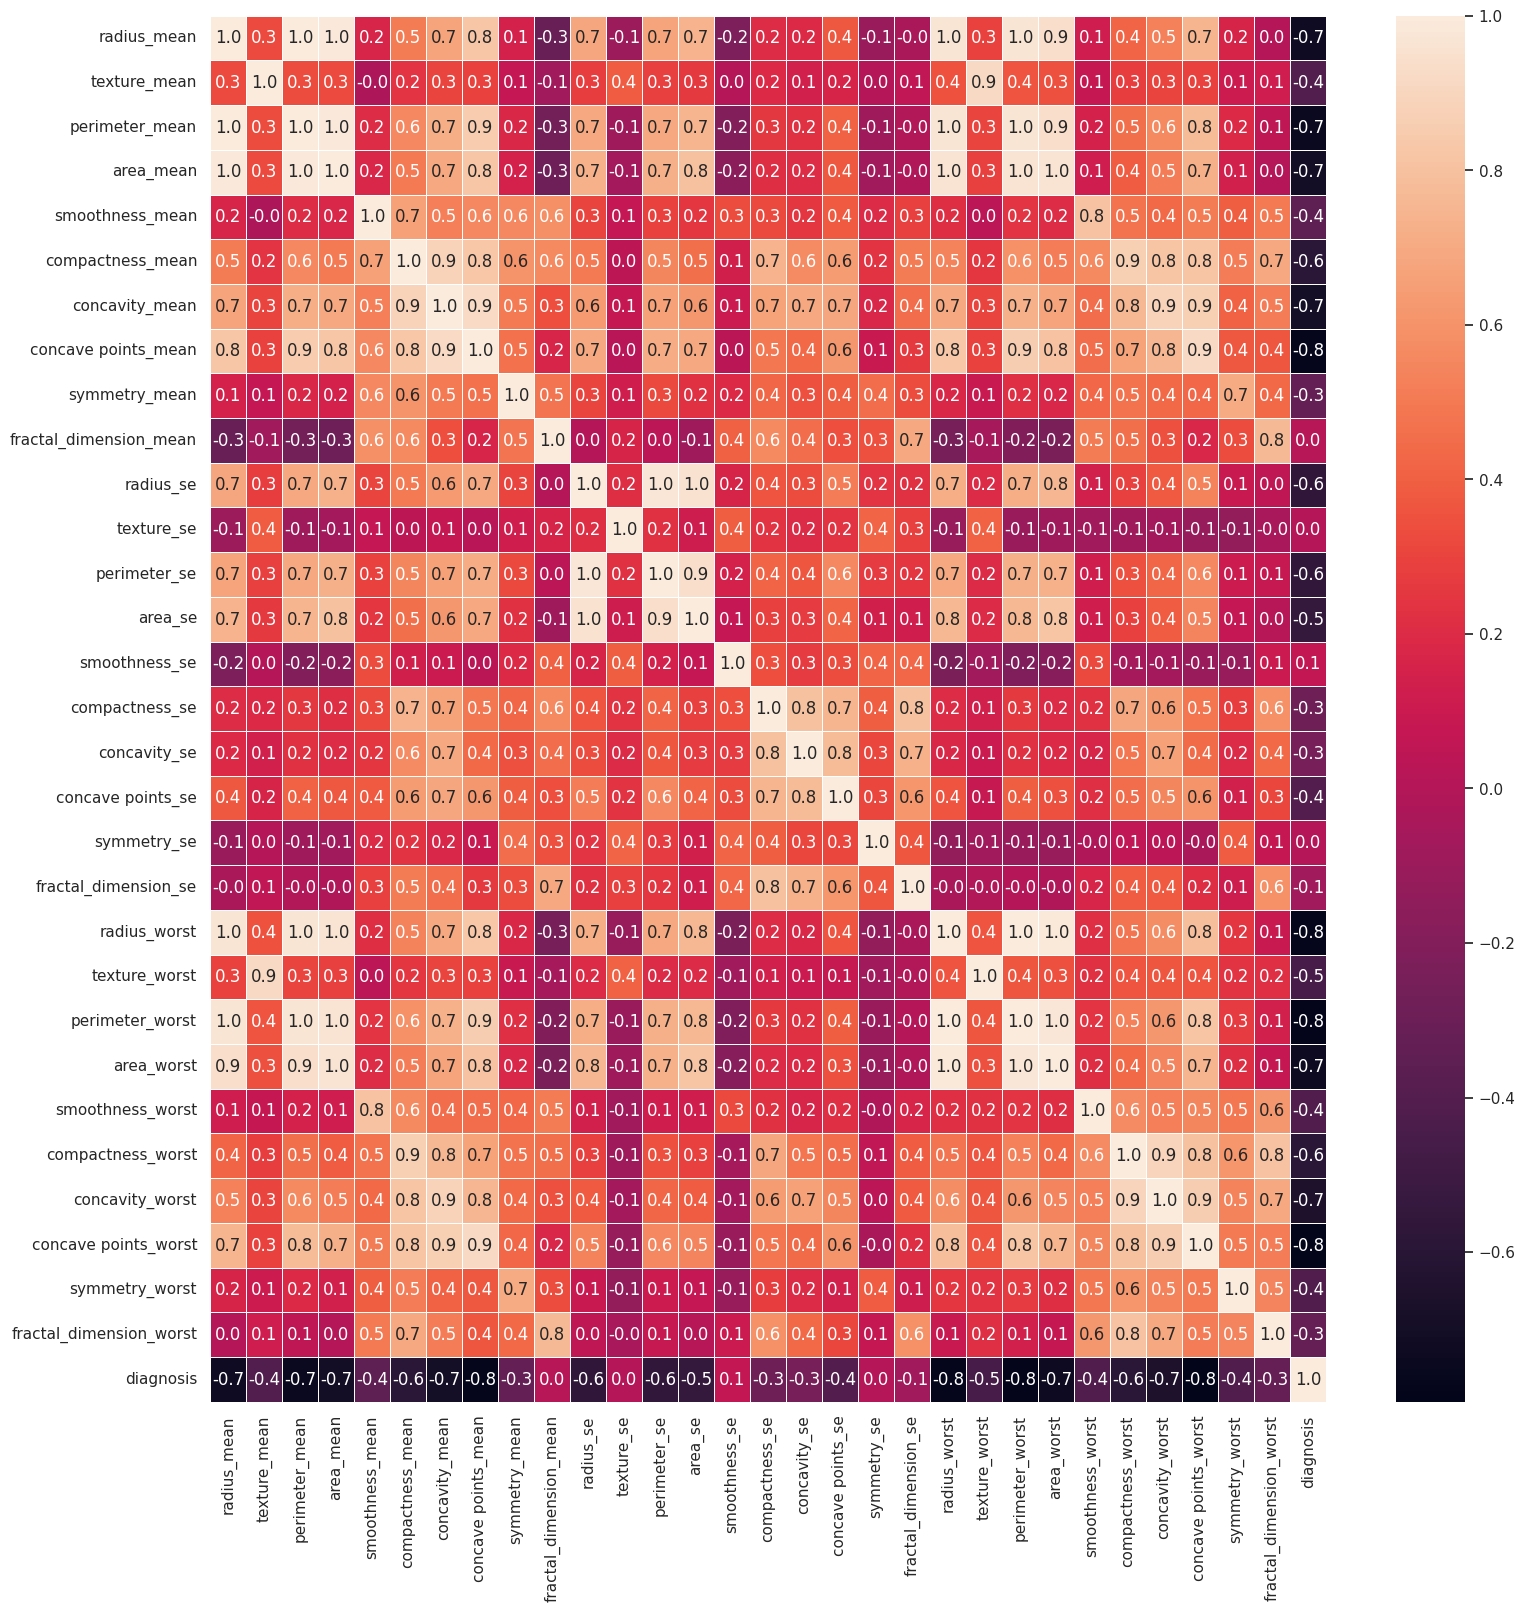

In [17]:
dataa["diagnosis"]=dataa["diagnosis_0"]
list = ['Unnamed: 32','id',"diagnosis_1","diagnosis_0"]
dataa= dataa.drop(list,axis = 1 )

#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dataa.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<AxesSubplot: >

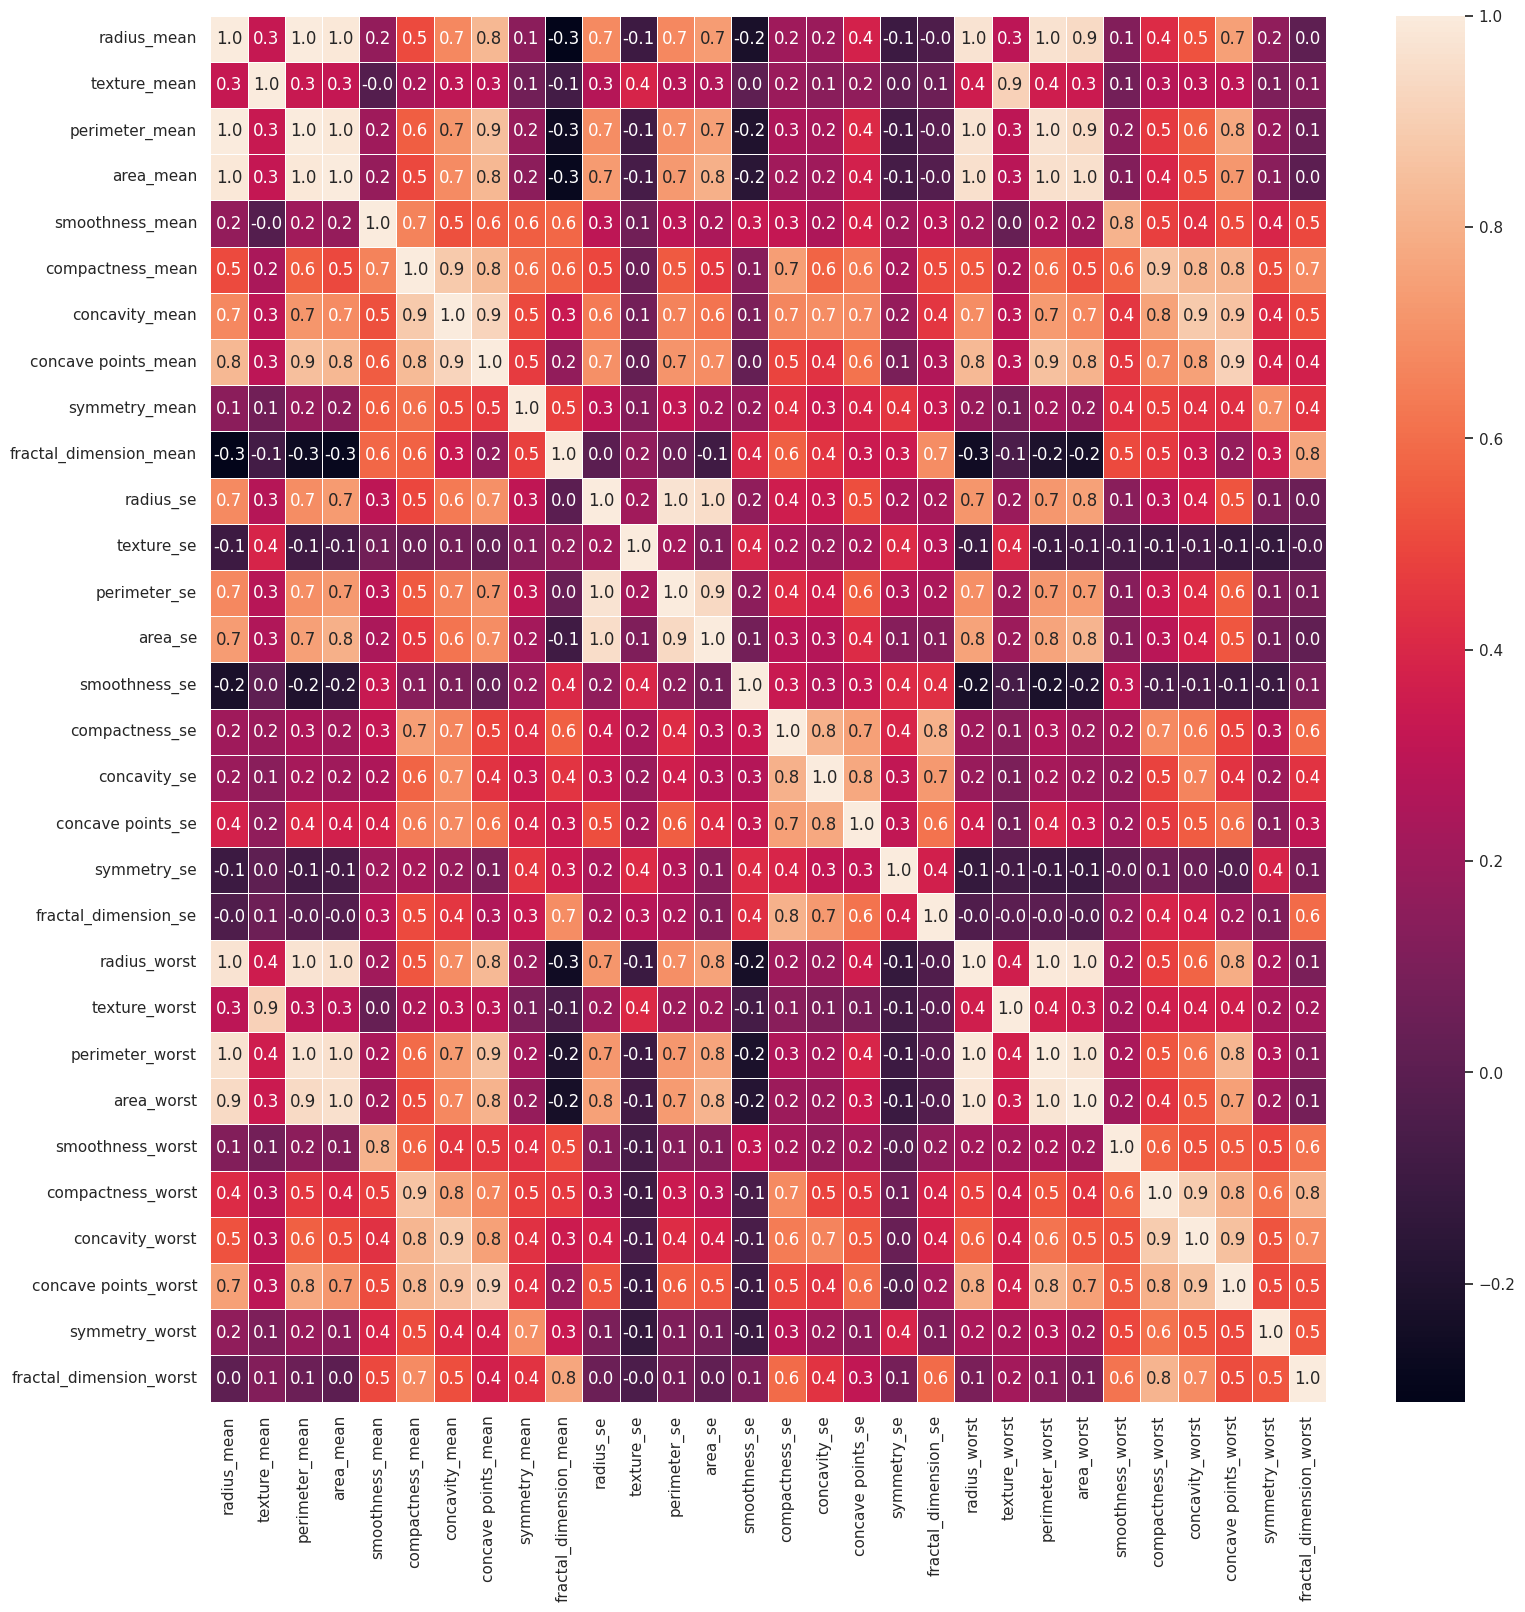

In [18]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [19]:
import statsmodels.api as sm
def p_values(df,pred_df,row,col,liste:list):
    """
    return X_l new train_dataframe for predict """
    global X_l
    X=np.append(arr=np.ones((row,col)).astype(int), values=df,axis=1)
    X_l=df.iloc[:,liste].values
    X_l=pd.DataFrame(np.array(X_l,dtype=float))
    model=sm.OLS(pred_df,X_l).fit()
    return model.summary(),X_l

In [20]:
x

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [21]:
dataa1=dataa.drop(labels="diagnosis",axis=1)
dataa_s=pd.DataFrame(dataa["diagnosis"])
pvalues=p_values(dataa1,dataa_s, 569 , 30, range(0,30))

In [22]:
pvalues

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:              diagnosis   R-squared (uncentered):                   0.675
 Model:                            OLS   Adj. R-squared (uncentered):              0.657
 Method:                 Least Squares   F-statistic:                              37.36
 Date:                Wed, 10 May 2023   Prob (F-statistic):                   1.72e-111
 Time:                        22:00:49   Log-Likelihood:                          4.4418
 No. Observations:                 569   AIC:                                      51.12
 Df Residuals:                     539   BIC:                                      181.4
 Df Model:                          30                                                  
 Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|     

Özellik Seçimi ve Rastgele Orman Sınıflandırması
Bugün amacımız yeni kokteyller denemek. Mesela sonunda bir bardayız ve farklı tatlar içmek istiyoruz. Bu nedenle içeceklerin içeriklerini karşılaştırmamız gerekir. Bunlardan biri limon içeriyorsa onu içtikten sonra limon içeren diğer içecekleri elimine etmek gerekiyor ki çok farklı tatlar deneyimleyebilelim.

Bu bölümde korelasyonlu özellik seçimi, tek değişkenli özellik seçimi, özyinelemeli özellik eleme (RFE), çapraz doğrulama ile özyinelemeli özellik eleme (RFECV) ve ağaç tabanlı özellik seçimi gibi farklı yöntemlerle öznitelik seçeceğiz. Modelimizi eğitmek ve tahmin etmek için rastgele orman sınıflandırması kullanacağız.

1) Korelasyon ve rastgele orman sınıflandırması ile özellik seçimi
Haritada görüldüğü gibi ısı rakamı yarıçap_ortalama, çevre_ortalama ve alan_ortalama birbiriyle ilişkilidir, bu nedenle sadece alan_ortalama kullanacağız. Alan_mean'i nasıl bir özellik olarak kullanacağımı sorarsanız, aslında doğru bir cevap yok, sadece sürü grafiklerine bakıyorum ve alan_mean benim için net görünüyor ama denemeden diğer ilişkili özellikler arasında tam ayrım yapamayız. Öyleyse diğer ilişkili özellikleri bulalım ve rastgele orman sınıflandırıcı ile doğruluk görelim.

Kompaktlık_ortalama, içbükeylik_ortalama ve içbükeylik_ortalama birbiriyle ilişkilidir. Bu nedenle sadece içbükeylik_ortalama'yı seçiyorum. Bunların dışında radius_se, perimeter_se ve field_se birbiriyle ilişkilidir ve ben sadece field_se kullanıyorum. yarıçap_en kötü, çevre_en kötü ve alan_en kötü birbiriyle ilişkilidir, bu yüzden ben en kötü alan kullanıyorum. Kompaktlık_en kötü, içbükey_en kötü ve içbükey noktalar_en kötü bu yüzden içbükey_en kötü olanı kullanıyorum. Compactness_se, concavity_se ve concave points_se bu yüzden concavity_se kullanıyorum. texture_mean ve texture_worst birbiriyle ilişkilidir ve ben texture_mean kullanıyorum. field_worst ve area_mean ilişkilidir, ben field_mean kullanıyorum.

In [23]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
0         10.38     1001.0          0.11840          0.3001         0.2419   
1         17.77     1326.0          0.08474          0.0869         0.1812   
2         21.25     1203.0          0.10960          0.1974         0.2069   
3         20.38      386.1          0.14250          0.2414         0.2597   
4         14.34     1297.0          0.10030          0.1980         0.1809   

   fractal_dimension_mean  texture_se  area_se  smoothness_se  concavity_se  \
0                 0.07871      0.9053   153.40       0.006399       0.05373   
1                 0.05667      0.7339    74.08       0.005225       0.01860   
2                 0.05999      0.7869    94.03       0.006150       0.03832   
3                 0.09744      1.1560    27.23       0.009110       0.05661   
4                 0.05883      0.7813    94.44       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
0      0.03003              0.006193            0.1622           0.7119   
1      0.01389              0.003532            0.1238           0.2416   
2      0.02250              0.004571            0.1444           0.4504   
3      0.05963              0.009208            0.2098           0.6869   
4      0.01756              0.005115            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

Düşürme korelasyonlu özelliklerden sonra, aşağıdaki korelasyon matrisinde de görülebileceği gibi, artık korelasyonlu özellik kalmamıştır. Aslında 0.9 korelasyon değeri olduğunu biliyorum ve görüyorsunuz ama onu düşürmezsek ne olacağını birlikte görelim.

<AxesSubplot: >

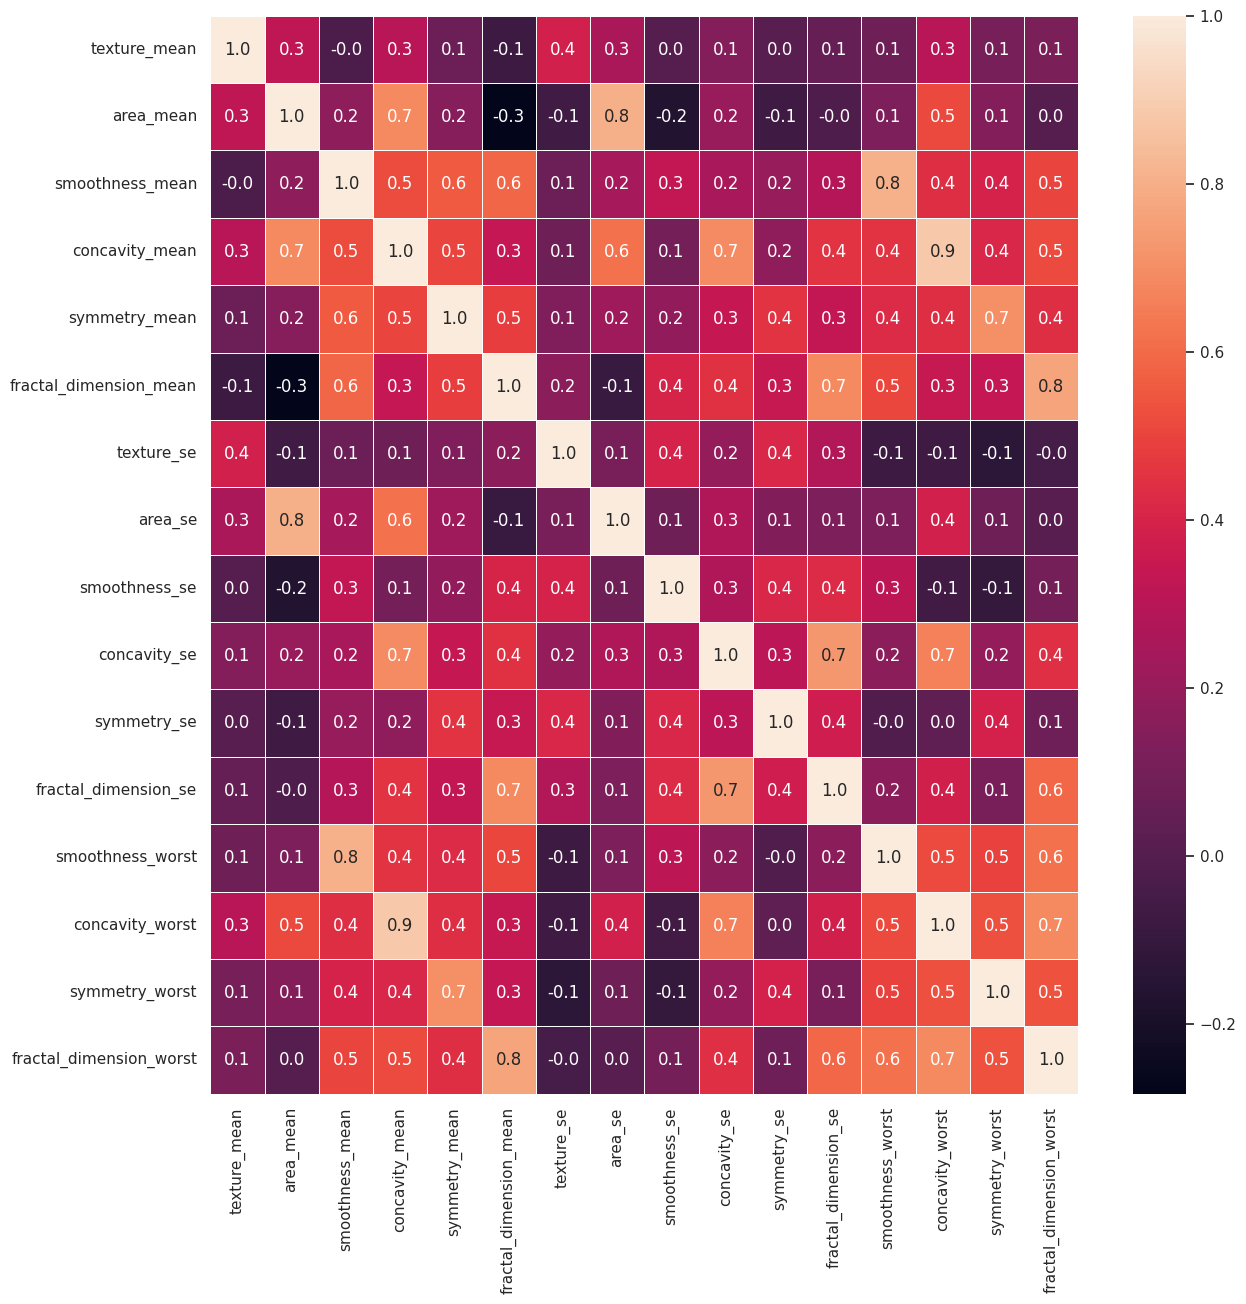

In [24]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Peki özelliklerimizi seçiyoruz ama doğru mu seçmişiz? Rastgele ormanı kullanalım ve seçilen özelliklere göre doğruluğu bulalım.

Accuracy is:  0.9649122807017544


<AxesSubplot: >

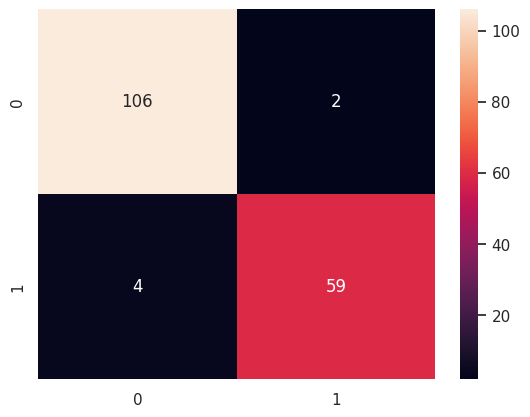

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Doğruluk yaklaşık %95'tir ve karışıklık matrisinden de görülebileceği gibi çok az yanlış tahminde bulunuruz. Şimdi daha iyi sonuçlar bulmak için diğer özellik seçim yöntemlerini görelim.

2) Tek değişkenli özellik seçimi ve rastgele orman sınıflandırması
Tek değişkenli özellik seçiminde, k en yüksek puanlama özelliği dışındaki tüm özellikleri kaldıran SelectKBest'i kullanacağız. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

Bu yöntemde kaç tane özellik kullanacağımızı seçmemiz gerekiyor. Örneğin, k (özellik sayısı) 5 mi, 10 mu, 15 mi olacak? Cevap sadece deniyor veya sezgisel olarak. Tüm kombinasyonları denemiyorum ama sadece k = 5'i seçiyorum ve en iyi 5 özelliği buluyorum.

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [27]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Sınıflandırılacak en iyi 5 özellik, rea_mean, area_se, texture_mean, concavity_worst and concavity_mean. Öyleyse, yalnızca bu en iyi puan alan 5 özelliği kullanırsak ne olacağını görelim.

Accuracy is:  0.9532163742690059


<AxesSubplot: >

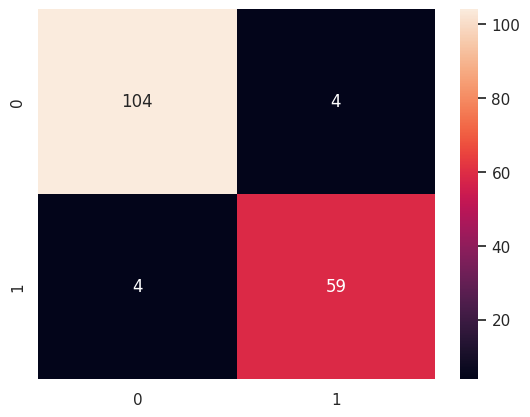

In [28]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Doğruluk yaklaşık %96'dır ve karışıklık matrisinden de görülebileceği gibi çok az yanlış tahminde bulunuruz. Şimdiye kadar yaptığımız şey, özellikleri korelasyon matrisine ve selectkBest yöntemine göre seçmekti. SelectkBest yönteminde 5 özellik kullanmamıza rağmen doğrulukları benzer görünmektedir. Şimdi daha iyi sonuçlar bulmak için diğer özellik seçim yöntemlerini görelim.

3) Rastgele orman ile özyinelemeli özellik eleme (RFE)
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html Temel olarak, sınıflandırma yöntemlerinden birini kullanır (bizim örneğimizde rastgele orman), her bir özelliğe ağırlık atayın. Mutlak ağırlıkları en küçük olanların mevcut set özelliklerinden budanır. Bu prosedür, budanmış sette istenen sayıda özellik elde edilene kadar yinelemeli olarak tekrarlanır.

Önceki yöntemde olduğu gibi, 5 özellik kullanacağız. Ancak hangi 5 özelliği kullanacağız? Bunları RFE yöntemi ile seçeceğiz.

In [29]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

ac = accuracy_score(y_test,rfe.predict(x_test))
print('Accuracy is: ',ac)

Accuracy is:  0.9415204678362573


In [30]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


rfe tarafından seçilen en iyi 5 özellik, texture_mean, field_mean, concavity_mean, field_se, concavity_worst. Önceki (selectkBest) yöntemine tamamen benzerler. Bu nedenle doğruluğu tekrar hesaplamamıza gerek yok. Kısaca rfe ve selectkBest yöntemleri ile iyi bir özellik seçimi yaptığımızı söyleyebiliriz. Ancak gördüğünüz gibi bir sorun var tamam ben en iyi 5 özelliğini iki farklı yöntemle buluyoruz ve bu özellikler aynı ama neden 5. Belki en iyi 2 veya en iyi 15 özelliğini kullanırsak daha iyi doğruluk elde ederiz. Bu nedenle, rfecv yöntemiyle kaç tane özellik kullanmamız gerektiğine bakalım.

4) Çapraz doğrulama ve rastgele orman sınıflandırması ile özyinelemeli özellik eleme
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html Şimdi sadece en iyi özellikleri değil, aynı zamanda en iyi doğruluk için kaç tane özelliğe ihtiyacımız olduğunu da bulacağız.

In [31]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 11
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'concavity_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


Son olarak, en iyi sınıflandırma için texture_mean, field_mean, concavity_mean, texture_se, field_se, concavity_se,chemistry_se, smoothness_worst, concavity_worst,chemistry_worst ve fractal_dimension_worst olan en iyi 11 özelliği bulduk. Arsa ile en iyi doğruluğa bakalım.

Feature ranking:
1. feature 1 (0.219485)
2. feature 7 (0.179195)
3. feature 13 (0.161543)
4. feature 3 (0.156141)
5. feature 14 (0.046654)
6. feature 0 (0.042855)
7. feature 9 (0.032123)
8. feature 12 (0.030397)
9. feature 2 (0.022508)
10. feature 11 (0.017924)
11. feature 4 (0.017568)
12. feature 8 (0.017376)
13. feature 15 (0.016610)
14. feature 5 (0.014755)
15. feature 6 (0.012474)
16. feature 10 (0.012390)


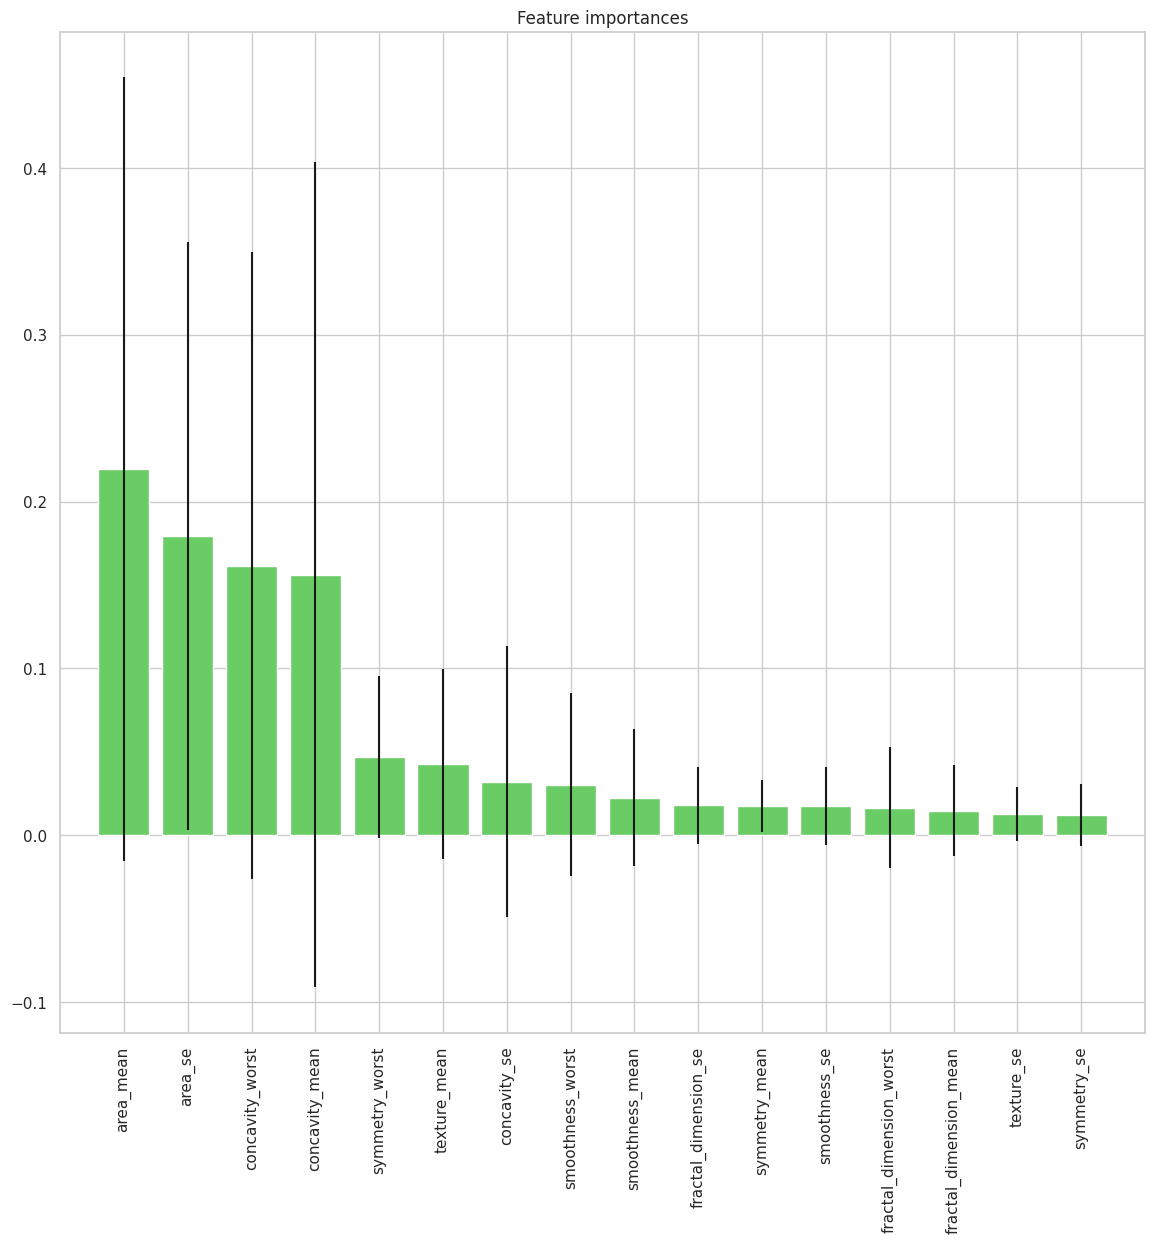

In [32]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Yukarıdaki grafikte de görebileceğiniz gibi, en iyi 5 özellikten sonra özelliklerin önemi azalır. Bu nedenle bu 5 özelliğe odaklanabiliriz. Daha önce üzüldüğüm gibi, özellikleri anlamaya ve en iyisini bulmaya önem veriyorum.

PCA ile Özellik Çıkarma http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html Özellik çıkarımı için temel bileşen analizi (PCA) kullanacağız. PCA'dan önce, PCA'nın daha iyi performansı için verileri normalleştirmemiz gerekiyor.

Text(0, 0.5, 'explained_variance_ratio_')

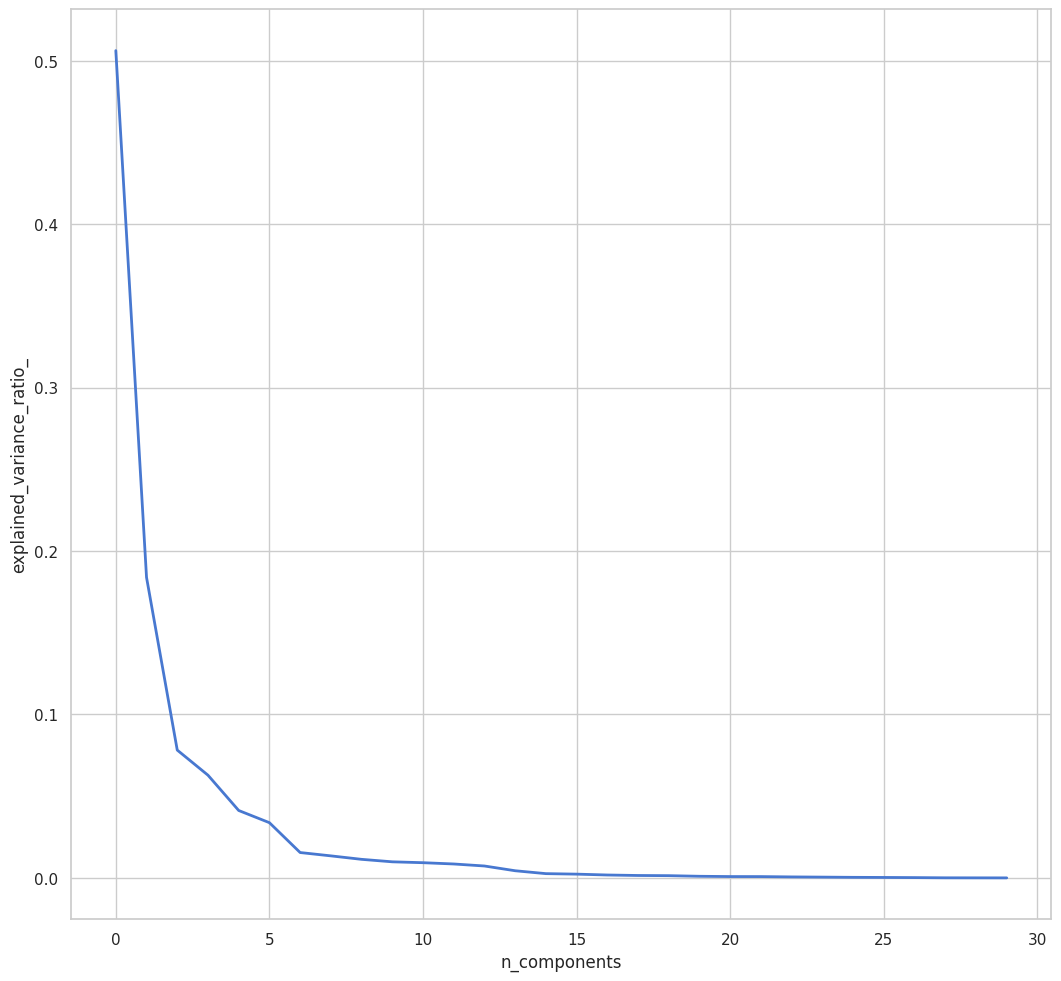

In [33]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

## Sonuç
Kısaca özellik seçimi ve veri görselleştirmenin önemini göstermeye çalıştım. Varsayılan veriler 33 özelliği içerir, ancak özellik seçiminden sonra bu sayıyı 33'ten 5'e %95 doğrulukla düşürürüz. Bu çekirdekte sadece temel şeyleri denedik, eminim bu veri görselleştirme ve özellik seçme yöntemleriyle, %95 doğruluğu kolaylıkla aşabilirsiniz. Belki diğer sınıflandırma yöntemlerini kullanabilirsiniz.

In [34]:
def prob_his(train_df,variable_x,variable_y):
    fig = px.histogram(train_df,x = variable_x, y = variable_y,color=variable_x,histfunc='avg',marginal='box',barmode='overlay',title=variable_x, width=700, height=500)
    fig.update_layout(bargap=0.1,barmode='stack')
    fig.show()

In [35]:
from sklearn.preprocessing import StandardScaler 
def scaler(train_df:pd.DataFrame):
    sc=StandardScaler()
    train_df=sc.fit_transform(train_df)
    return train_df
x_s=scaler(x_1)
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_s, y, test_size=0.3, random_state=42)


In [36]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge,RidgeCV
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
def Classifiers(x_train,y_train,n_splits):
    random_state = 42
    classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

    dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

    svc_param_grid = {"kernel": ["rbf"],
                  "gamma": [0.001, 0.01, 0.1, 1],
                  "C": [1, 10, 50, 100, 200, 300, 1000],
                  "probability": [True]}

    rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

    logreg_param_grid = {"C": np.logspace(-3,3,7),
                     "penalty": ["l1", "l2"],

                     "max_iter": [100, 500, 1000]}


    knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
    classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]
    cv_result = []
    best_estimators=[]
    
    for i in range(len(classifier)):
        clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = n_splits), scoring = "accuracy", n_jobs = -1,verbose = 1)
        clf.fit(x_train,y_train)
        cv_result.append(clf.best_score_)
        best_estimators.append(clf.best_estimator_)
        print(cv_result[i])
    cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

    prob_his(cv_results,"Cross Validation Means", "ML Models")
    return best_estimators,cv_results


n_splits parametresi, verilerin bölüneceği kümelerin sayısını belirten bir parametredir. Bu parametre, kullanılan çapraz doğrulama yöntemi (StratifiedKFold) için belirlenir.

Örneğin, n_splits=5 değeri verildiğinde, veri seti beş eşit parçaya ayrılır ve bu beş parçadan biri test seti olarak, geri kalan dört parça ise eğitim seti olarak kullanılır. Bu işlem beş kez tekrarlanarak her bir parça ayrı ayrı test verisi olarak kullanılır ve sonuçlar ortalaması alınarak bir çapraz doğrulama puanı elde edilir.

Bu sayede, modelin performansı veri setinin farklı parçaları üzerinde değerlendirilir ve aynı veri seti üzerinde overfitting sorunu engellenmeye çalışılır.

`GridSearchCV`, hiperparametre optimizasyonu yapmak için kullanılan bir çapraz doğrulama yöntemidir. Verilen bir makine öğrenmesi modeli ve modelin hiperparametrelerinin olası değerleri, `GridSearchCV` ile belirlenir. 

`GridSearchCV` ayrıca bir skorlama metriği belirler ve modelin her bir hiperparametre kombinasyonu için skorlama metriği kullanarak performansını ölçer. 

`GridSearchCV`, tüm olası hiperparametre kombinasyonlarını deneyerek en iyi hiperparametrelerin seçilmesini sağlar. Bu, manuel olarak hiperparametreleri ayarlamaktan daha verimlidir. 

`GridSearchCV`, hiperparametreler için bir "parametre ızgarası" belirler ve bu ızgarada belirtilen tüm hiperparametre kombinasyonlarını deneyerek en iyi kombinasyonu seçer. Bu ızgara, farklı hiperparametreler ve her bir hiperparametrenin olası değerleri arasındaki tüm kombinasyonları içerebilir. 

`GridSearchCV` ayrıca bir çapraz doğrulama yöntemi belirler ve hiperparametrelerin performansını ölçmek için bu yöntemi kullanır. Böylece modelin performansı tüm veri kümesinde değil, farklı veri kümeleri üzerinde ölçülür ve modelin genelleştirilebilirliği arttırılır.

In [37]:
best_estimators,cv_results=Classifiers(x_train, y_train,5)


Fitting 5 folds for each of 250 candidates, totalling 1250 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0.8918987341772151
Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.9723101265822784
Fitting 5 folds for each of 54 candidates, totalling 270 fits
0.9672784810126581
Fitting 5 folds for each of 42 candidates, totalling 210 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9672784810126581
Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.9673417721518988


In [38]:
def Classifiers_estimators(best_estimators,x_train,y_train,x_test,y_test,name_1_estimator,name_2_estimator,name_3_estimator,one_num,two_num,three_num):
    votingC = VotingClassifier(estimators = [("SVC",best_estimators[one_num]),
                                        ("rfc",best_estimators[two_num]),
                                        ("knn",best_estimators[three_num])],
                                        voting = "soft", n_jobs = -1)
    votingC = votingC.fit(x_train, y_train)
    #print(votingC)
    y_predict=votingC.predict(x_test)
    print("accuracy_score",accuracy_score(votingC.predict(x_test),y_test)) 
    cm=confusion_matrix(y_test, y_predict)
    print("Confusion Matrix:\n",cm )
    return votingC ,y_predict

In [39]:
votingC ,y_predict=Classifiers_estimators(best_estimators,x_train, y_train, x_test, y_test, "SVC", "rfc", "knn", 1,2,4)

accuracy_score 0.9590643274853801
Confusion Matrix:
 [[104   4]
 [  3  60]]


Bu bir karışıklık matrisidir ve sınıflandırma modellerinin performansını değerlendirmek için kullanılır. Genellikle, doğru ve yanlış sınıflandırma sayılarını gösterir.

Bu özel karışıklık matrisi, iki sınıfın (Sınıf 0 ve Sınıf 1) olduğu bir sınıflandırma modelinin performansını gösterir. Matris, tahminlerin gerçek sınıflarla nasıl karşılaştırıldığını gösterir.

[[107 1]<br>
[3 60]]

Matrisin sol üst köşesi, gerçek sınıfı 0 olan 107 örneğin doğru bir şekilde tahmin edildiğini gösterir. Sağ üst köşesi, gerçek sınıfı 1 olan ancak yanlışlıkla sınıf 0 olarak tahmin edilen 1 örnek gösterir.

Sol alt köşesi, gerçek sınıfı 0 olan ancak yanlışlıkla sınıf 1 olarak tahmin edilen 3 örnek gösterir. Sağ alt köşesi, gerçek sınıfı 1 olan 60 örneğin doğru bir şekilde tahmin edildiğini gösterir.

Bu matrisi kullanarak, modelin doğruluğunu (Accuracy), hassasiyetini (Precision), duyarlılığını (Recall) ve F1 puanını hesaplayabilirsiniz.

5) Ağaç tabanlı özellik seçimi ve rastgele orman sınıflandırması
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html Rastgele orman sınıflandırma yönteminde, özellik önemleri olan bir featureimportances öznitelikleri vardır (özellik ne kadar yüksekse, özellik o kadar önemlidir). !!! feature_importance yöntemini kullanmak için, eğitim verilerinde ilişkili özelliklerin olmaması gerekir. Rastgele orman her yinelemede rastgele seçer, bu nedenle özellik önem listesinin sırası değişebilir.

In [40]:
pvalues=p_values(dataa1,dataa_s, 569 , 30, range(0,30))

In [41]:
column=dataa1.columns

In [42]:
a=[1,4,5,11,12,18,24,25]
for i in a:
    print("'",column[i],"'",",", end=' ')

' texture_mean ' , ' smoothness_mean ' , ' compactness_mean ' , ' texture_se ' , ' perimeter_se ' , ' symmetry_se ' , ' smoothness_worst ' , ' compactness_worst ' , 

In [43]:
drop_list4 = ['texture_mean' , 'smoothness_mean' , 'compactness_mean' , 'texture_se' , 'perimeter_se' , 'symmetry_se' , 'smoothness_worst' , 'compactness_worst' ]
x_4 = x[drop_list4]

In [44]:
x_4.head()

texture_mean  smoothness_mean  compactness_mean  texture_se  perimeter_se  \
0         10.38          0.11840           0.27760      0.9053         8.589   
1         17.77          0.08474           0.07864      0.7339         3.398   
2         21.25          0.10960           0.15990      0.7869         4.585   
3         20.38          0.14250           0.28390      1.1560         3.445   
4         14.34          0.10030           0.13280      0.7813         5.438   

   symmetry_se  smoothness_worst  compactness_worst  
0      0.03003            0.1622             0.6656  
1      0.01389            0.1238             0.1866  
2      0.02250            0.1444             0.4245  
3      0.05963            0.2098             0.8663  
4      0.01756            0.1374             0.2050

In [45]:
x_4["diagnosis"]=y

In [46]:
pio.templates.default = 'plotly_dark'
def create_hist(xval,color):
    fig = px.histogram(x_4,x=xval,color=color,title=xval,color_discrete_sequence = ['yellowgreen','gold'],width=600,height=300)
    fig.show()

In [47]:
create_hist('texture_mean','diagnosis')
create_hist('smoothness_mean','diagnosis')
create_hist('compactness_mean','diagnosis')
create_hist('texture_se','diagnosis')
create_hist('perimeter_se','diagnosis')
create_hist('symmetry_se','diagnosis')
create_hist('smoothness_worst','diagnosis')
create_hist('compactness_worst','diagnosis')

<AxesSubplot: >

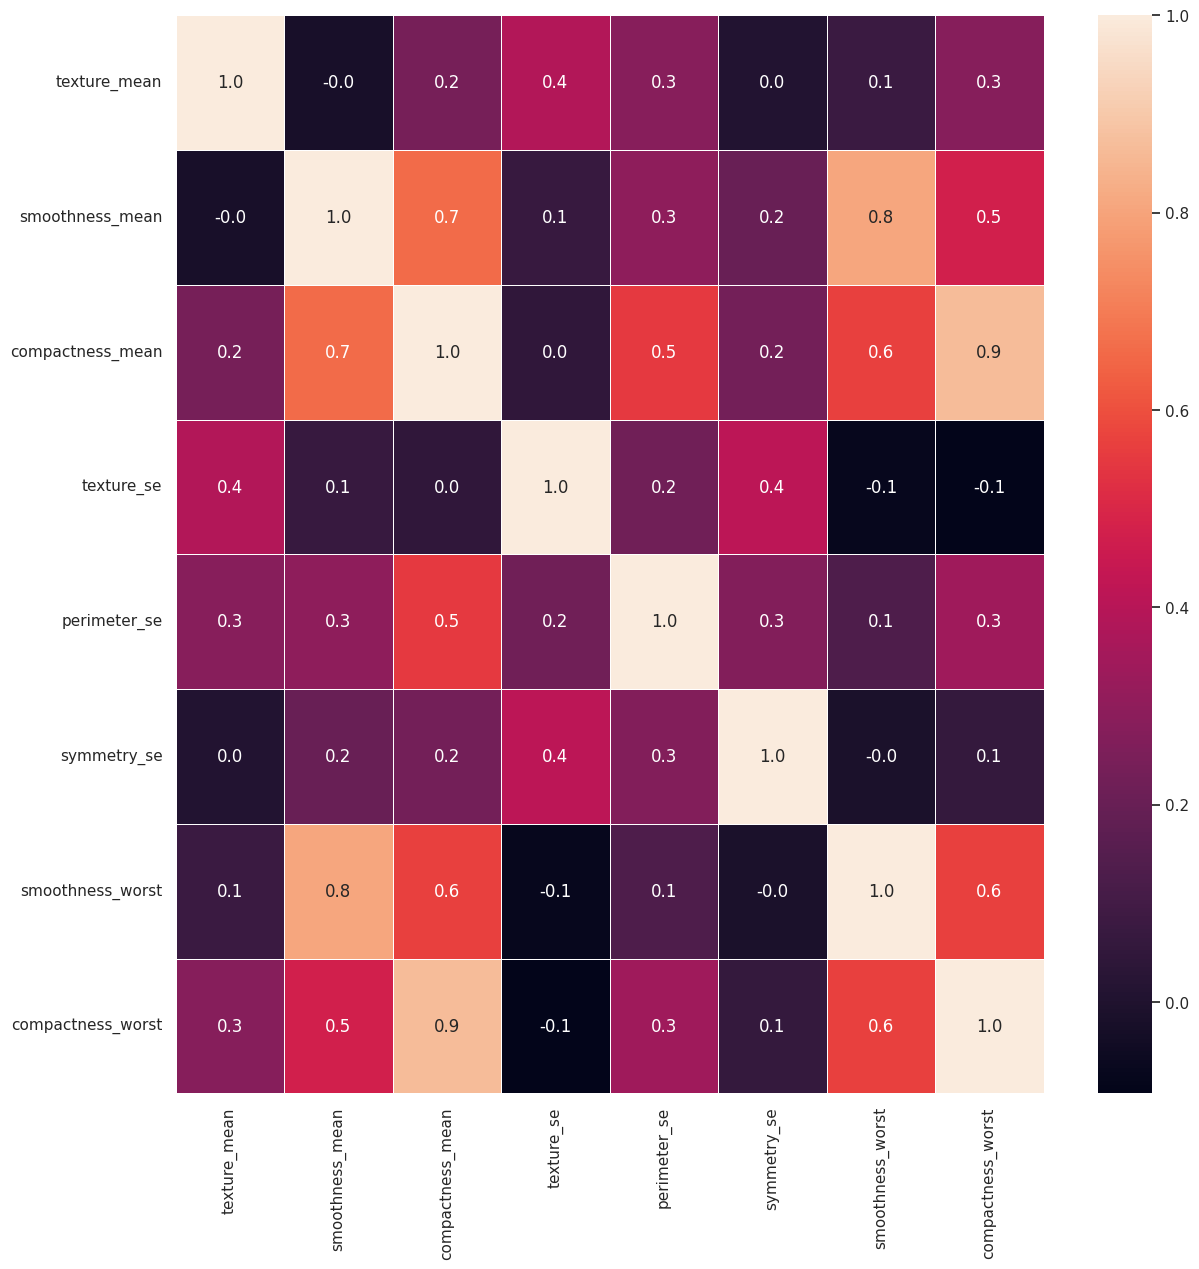

In [48]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_4.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [49]:
pio.templates.default = 'plotly_dark'
def create_scatter(xval,yval):
    fig = px.scatter(x_4,x=xval,y=yval,color='diagnosis',title =xval +" "+"vs"+" "+ yval, color_discrete_sequence = ['yellowgreen','gold'],width=600,height=300)
    fig.show()
create_scatter('smoothness_mean','compactness_mean')
create_scatter('smoothness_mean','compactness_worst')
create_scatter('compactness_mean','compactness_worst')
create_scatter('smoothness_worst','smoothness_mean')
create_scatter('compactness_mean','smoothness_mean')

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
x4 = x_4.drop('diagnosis',axis=1)
y4 = x_4['diagnosis']
le = LabelEncoder()
y4 = le.fit_transform(y)
x_train,x_test,y_train,y_test = train_test_split(x4,y4,test_size=0.2,random_state=0,stratify=y)

In [51]:
x_train.shape,x_test.shape

((455, 8), (114, 8))

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [54]:
x_train = x_train.reshape(455,8,1)
x_test = x_test.reshape(114,8,1);

In [55]:
epochs=50
model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(8,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 32)             96        
                                                                 
 batch_normalization (BatchN  (None, 7, 32)            128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 7, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 64)             4160      
                                                                 
 batch_normalization_1 (Batc  (None, 6, 64)            256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 6, 64)             0

In [57]:
model.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [58]:
history = model.fit(x_train,y_train,epochs=60,validation_data=(x_test,y_test),verbose=1)

Epoch 1/60
15/15 [==============================] - 3s 33ms/step - loss: 0.6594 - accuracy: 0.7011 - val_loss: 0.6074 - val_accuracy: 0.8596
Epoch 2/60
15/15 [==============================] - 0s 10ms/step - loss: 0.4140 - accuracy: 0.8132 - val_loss: 0.5600 - val_accuracy: 0.8421
Epoch 3/60
15/15 [==============================] - 0s 10ms/step - loss: 0.3689 - accuracy: 0.8418 - val_loss: 0.5266 - val_accuracy: 0.8070
Epoch 4/60
15/15 [==============================] - 0s 9ms/step - loss: 0.3273 - accuracy: 0.8791 - val_loss: 0.5023 - val_accuracy: 0.8070
Epoch 5/60
15/15 [==============================] - 0s 10ms/step - loss: 0.3207 - accuracy: 0.8923 - val_loss: 0.4848 - val_accuracy: 0.7895
Epoch 6/60
15/15 [==============================] - 0s 9ms/step - loss: 0.2764 - accuracy: 0.8813 - val_loss: 0.4696 - val_accuracy: 0.7719
Epoch 7/60
15/15 [==============================] - 0s 9ms/step - loss: 0.3046 - accuracy: 0.8725 - val_loss: 0.4494 - val_accuracy: 0.8070
Epoch 8/60
15/15

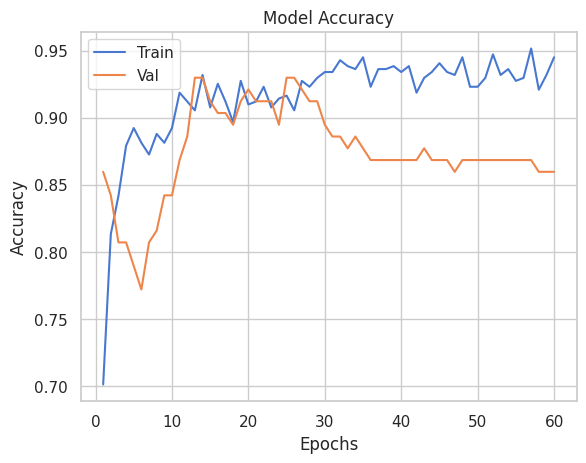

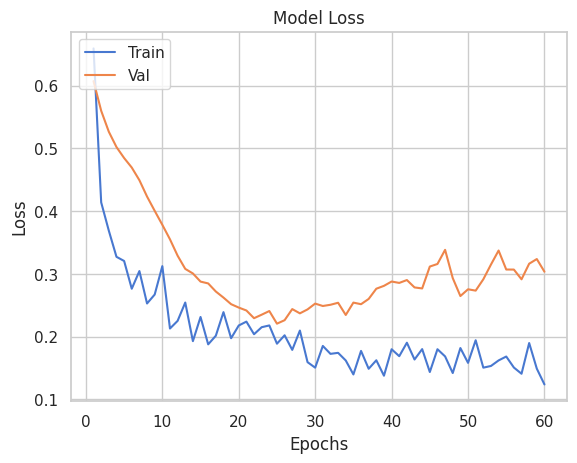

In [59]:
epoch_range= range(1,61)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

epoch_range= range(1,61)
plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [60]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = model.predict(x_test)


rounded_arr = np.round(y_pred, 0)

accuracy_score(y_test,rounded_arr)

4/4 [==============================] - 0s 3ms/step


0.8596491228070176

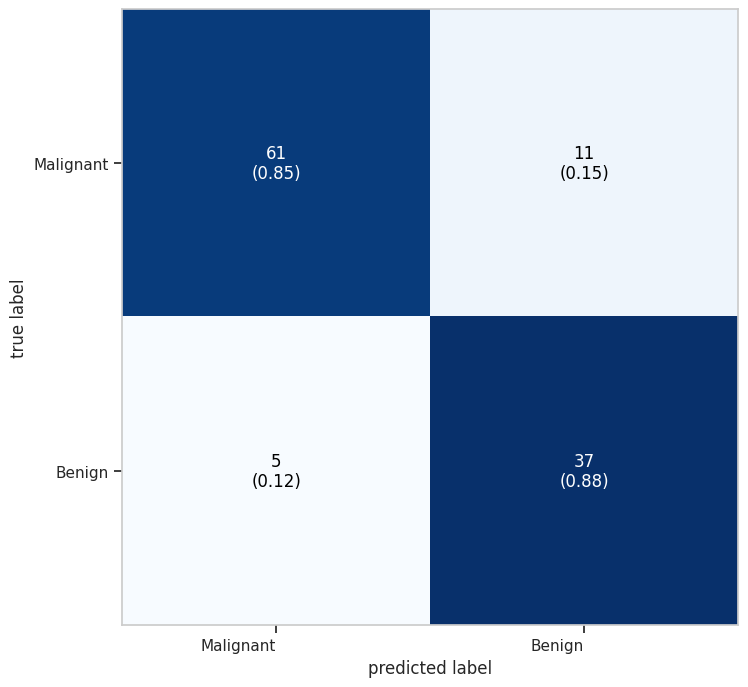

In [61]:
mat = confusion_matrix(y_test,rounded_arr)
classes_name=['Malignant','Benign']
plot_confusion_matrix(mat,figsize=(10,8),class_names=classes_name,show_normed=True)
plt.xticks(rotation=0);